# Setting Everything Up

In [1]:
import pandas as pd
from datetime import datetime

In [2]:
#import the file from the web
import requests
from bs4 import BeautifulSoup
import pandas as pd
from unicodedata import normalize
import re
from datetime import datetime
from pandas import read_csv 
from sklearn.feature_extraction.text import CountVectorizer
import json
from flatten_json import flatten


# I can give a number or use None to remove maximum ceiling & display all columns
pd.options.display.max_columns = None

# # I want to be able to see the entire narrative, so remove the maximum width for each column
# pd.options.display.max_colwidth = None

# pd.options.display.float_format = '{:,.0f}'.format

import string

%matplotlib inline

In [3]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (8, 8)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [4]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [5]:
%%R

# My commonly used R imports

require('tidyverse')

R[write to console]: Loading required package: tidyverse



── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [6]:
#To Download PDFs
from urllib.parse import urljoin

In [7]:
#To import camelot and PDF-related items
import camelot
import ghostscript
import sys

In [8]:
%%R

library(jpeg)
library(wordcloud)
library(RColorBrewer)
library(wordcloud2)
library(tm)
library(ggrepel)


R[write to console]: Loading required package: RColorBrewer

R[write to console]: Loading required package: NLP

R[write to console]: 
Attaching package: ‘NLP’


R[write to console]: The following object is masked from ‘package:ggplot2’:

    annotate




In [9]:
from sklearn.feature_extraction.text import CountVectorizer

In [10]:
%%R
library(vistime)
library(shiny)
library(plotly)
#for timeline plotting

R[write to console]: 
Attaching package: ‘plotly’


R[write to console]: The following object is masked from ‘package:ggplot2’:

    last_plot


R[write to console]: The following object is masked from ‘package:stats’:

    filter


R[write to console]: The following object is masked from ‘package:graphics’:

    layout




In [11]:
from collections import Counter


In [12]:
# for playwright stuff
import time
from playwright.async_api import async_playwright
import asyncio
import nest_asyncio


In [13]:
# for checkpointing
import os

In [14]:
# for merging csvs
import glob

In [15]:
# for changing string to list in df
import ast



In [16]:
#to keep the scraper running
import caffeine

In [17]:
import csv

In [18]:
import random

# Read CSV

In [49]:
df_prime_search_data=pd.read_csv("DC data journalist exercise.csv")
df_prime_search_data

,keyword,visibility_score,avg_monthly_search_volume,company,portion_of_visibility_score_over_monthly_search
0,PS5,2026582,2853065,PlayStation 5,0.710318
1,Nintendo Switch,1766588,2274070,Nintendo Switch,0.776840
2,PlayStation 5,1523795,1648874,PlayStation 5,0.924143
3,Xbox Series X,1144954,1520005,Xbox,0.753257
4,PS5 controller,1031343,1495137,PlayStation 5,0.689798
5,Nintendo Switch games,1539790,1414722,Nintendo Switch,1.088405
6,Xbox controller,991012,1331966,Xbox,0.744022
7,Roblox gift card,579148,1318070,Roblox gift card,0.439391
8,PS5 console,911248,1210014,PlayStation 5,0.753089
9,Xbox Series S,775596,1177435,Xbox,0.658717


In [98]:
df_prime_search_data_company=pd.read_csv("company DC data journalist exercise.csv")
df_prime_search_data_company

,company,sum_visibility,sum_monthly_average,sum_visibility_over_monthly_avg
0,Gaming headset,578593,590595,0.979678
1,Nintendo Switch,4869143,4454285,1.093137
2,PlayStation 5,6349872,7968749,0.796847
3,Quest 3,1284624,738418,1.739698
4,Roblox gift card,579148,1318070,0.439391
5,Xbox,3764359,5095287,0.738792


# Word Cloud

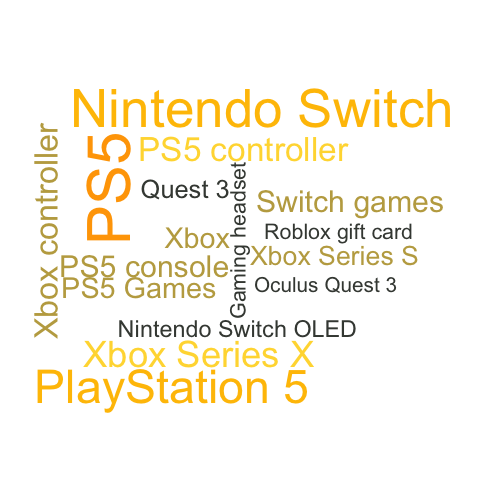

In [44]:
%%R -i df_prime_search_data

amazon_colors <- c("#FF9900", "#232F3E", "#FFDB58", "#FFD700", "#FFA500")  # Adding mustard, gold, and another orange

amazon_palette <- colorRampPalette(amazon_colors)(8)  # Generates 8 colors between the two primary colors

wordcloud(words = df_prime_search_data$keyword, 
          freq = df_prime_search_data$visibility_score, 
#           min.freq = 10,
#           max.words=100, 
#           random.order=FALSE, 
          rot.per=0.125, 
          scale=c(5, 0.5),
          colors=amazon_palette)


In [47]:
# ! pip install WordCloud

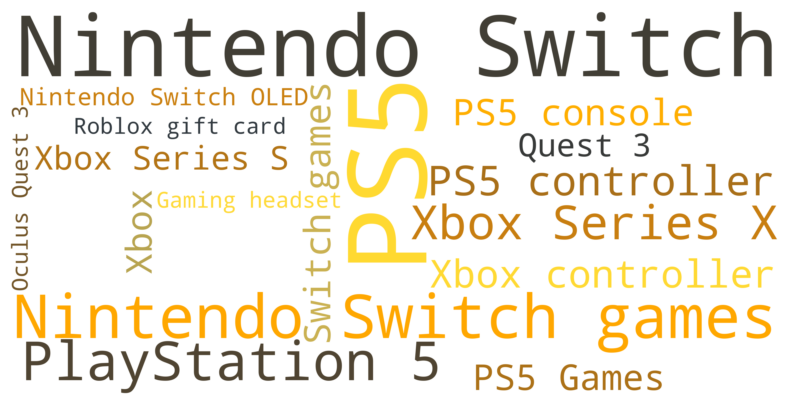

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from matplotlib.colors import LinearSegmentedColormap


# Create a dictionary from the DataFrame
word_freq = dict(zip(df_prime_search_data['keyword'], df_prime_search_data['visibility_score']))

# Define the Amazon colors
amazon_colors = ["#FF9900", "#232F3E", "#FFDB58", "#FFD700", "#FFA500"]

# Create a custom colormap
amazon_colormap = LinearSegmentedColormap.from_list('amazon_colors', amazon_colors)

# Create a word cloud
wordcloud = WordCloud(
    width = 800,
    height = 400,
    background_color = 'white',
    colormap = amazon_colormap,  # You can change the colormap to match Amazon colors
    scale = 5,
    relative_scaling = 0.5
).generate_from_frequencies(word_freq)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


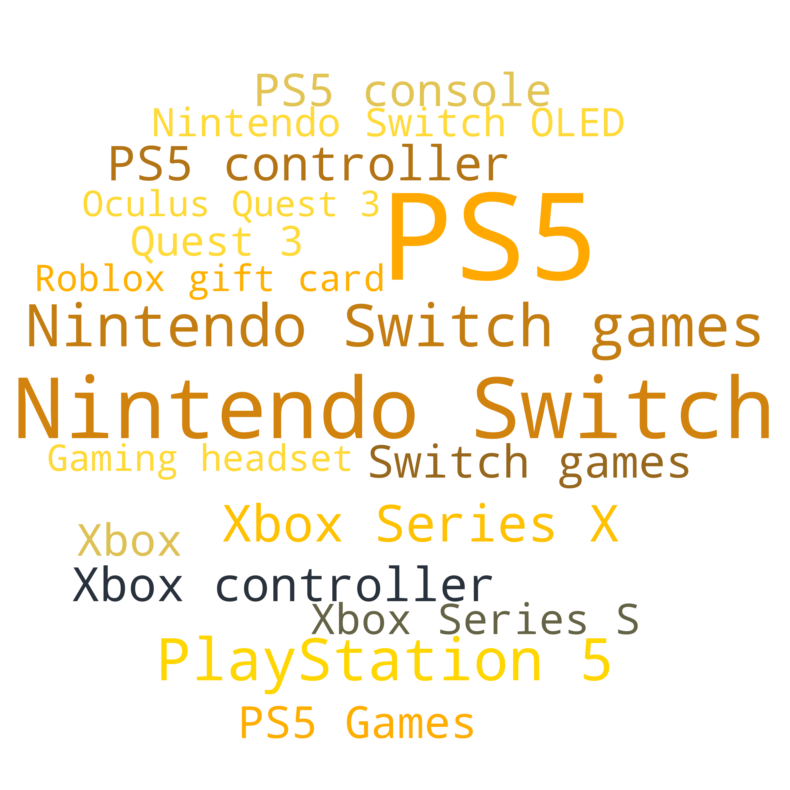

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from matplotlib.colors import LinearSegmentedColormap

# Create a dictionary from the DataFrame
word_freq = dict(zip(df_prime_search_data['keyword'], df_prime_search_data['visibility_score']))

# Define the Amazon colors
amazon_colors = ["#FF9900", "#232F3E", "#FFDB58", "#FFD700", "#FFA500"]

# Create a custom colormap
amazon_colormap = LinearSegmentedColormap.from_list('amazon_colors', amazon_colors)

# Create a binary mask for a soft circular shape
radius = 400  # Change radius according to desired size
center = (radius, radius)
y, x = np.ogrid[:radius*2, :radius*2]
mask = (x - center[1]) ** 2 + (y - center[0]) ** 2 <= radius ** 2
mask = 255 * (1 - mask.astype(int))  # Convert boolean to int and scale to 255

# Create a word cloud with the soft circular shape
wordcloud = WordCloud(
    width=250,
    height=250,  # Set the height to match width for a soft circular appearance
    background_color='white',
    colormap=amazon_colormap,
    mask=mask,  # Use the soft circular mask here
    contour_width=0,
    contour_color='black',
    scale=5,
    relative_scaling=0.5
).generate_from_frequencies(word_freq)

# Plot the word cloud
plt.figure(figsize=(10, 10))  # Set the figsize to square for better visualization
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


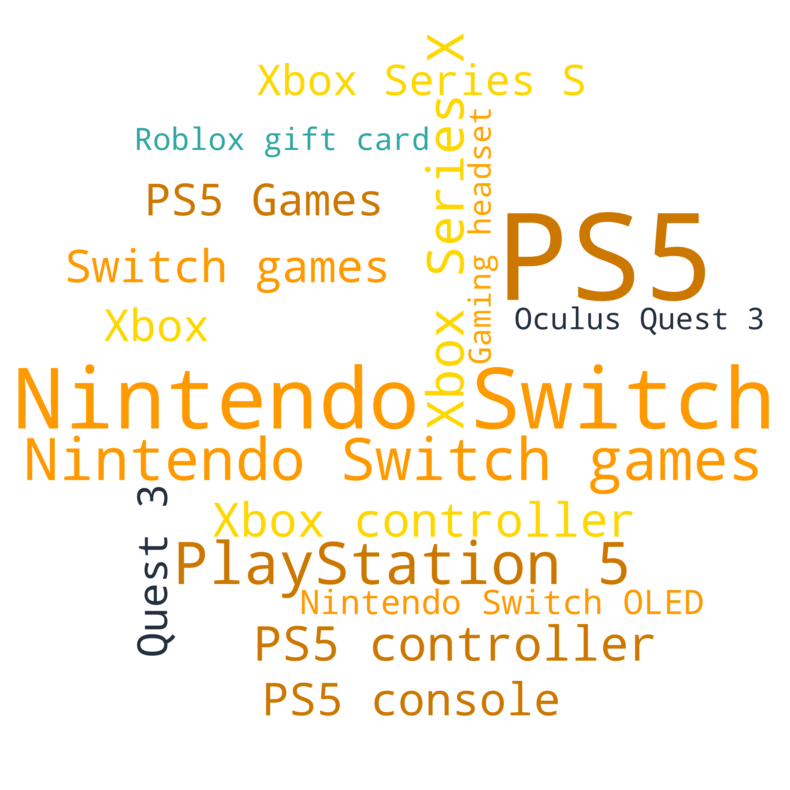

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from matplotlib.colors import LinearSegmentedColormap

# Assuming your DataFrame is already loaded as df_prime_search_data

# Create a dictionary from the DataFrame
word_freq = dict(zip(df_prime_search_data['keyword'], df_prime_search_data['visibility_score']))

# Define a dictionary of company colors. Modify this to suit your needs.
company_colors = {
    "Gaming headset": "#FFA500",
    "Nintendo Switch": "#FF9900",
    "PlayStation 5": "#CC7700",
    "Quest 3": "#232F3E",
    "Roblox gift card": "#30A7A3",
    "Xbox": "#FFD700"  
}


# Function to assign colors based on company
def color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    company = df_prime_search_data[df_prime_search_data['keyword'] == word]['company'].iloc[0]
    return company_colors.get(company, "black")  # default to black if company not in dictionary

# Create a custom colormap (this won't be used if you're using color_func)
amazon_colormap = LinearSegmentedColormap.from_list('amazon_colors', list(company_colors.values()))

# The rest of your mask and word cloud generation code remains largely unchanged
radius = 400
center = (radius, radius)
y, x = np.ogrid[:radius*2, :radius*2]
mask = (x - center[1]) ** 2 + (y - center[0]) ** 2 <= radius ** 2
mask = 255 * (1 - mask.astype(int))

wordcloud = WordCloud(
    width=250,
    height=250,
    background_color='white',
    colormap=amazon_colormap,
    mask=mask,
    contour_width=0,
    contour_color='black',
    scale=5,
    relative_scaling=0.5,
    color_func=color_func  # Use the color_func here
).generate_from_frequencies(word_freq)

plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


In [83]:
# Save word cloud as SVG
svg = wordcloud.to_svg()
with open("wordcloud.svg", "w") as f:
    f.write(svg)

In [84]:
image = wordcloud.to_image()
image.save("wordcloud.jpg", "JPEG")


In [69]:
# ! pip install seaborn

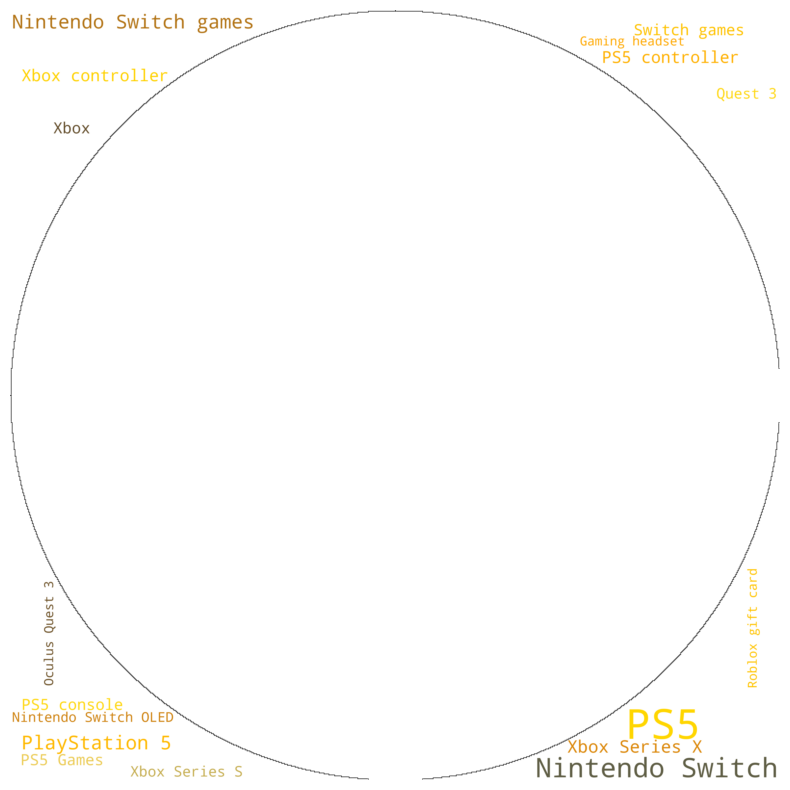

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from matplotlib.colors import LinearSegmentedColormap

# Create a dictionary from the DataFrame
word_freq = dict(zip(df_prime_search_data['keyword'], df_prime_search_data['visibility_score']))

# Define the Amazon colors
amazon_colors = ["#FF9900", "#232F3E", "#FFDB58", "#FFD700", "#FFA500"]

# Create a custom colormap
amazon_colormap = LinearSegmentedColormap.from_list('amazon_colors', amazon_colors)

# Create a binary mask for a circular shape
radius = 400  # Change radius according to desired size
center = (radius, radius)
y, x = np.ogrid[:radius*2, :radius*2]
mask = (x - center[1]) ** 2 + (y - center[0]) ** 2 <= radius ** 2
mask = mask.astype(int) * 255  # Convert boolean to int and scale to 255

# Create a word cloud with the mask
wordcloud = WordCloud(
    width = 800,
    height = 800,  # Changed the height to match width for a perfect circle
    background_color = 'white',
    colormap = amazon_colormap,
    mask = mask,  # Use the circular mask here
    contour_width=1,
    contour_color='black',
    scale = 5,
    relative_scaling = 0.5
).generate_from_frequencies(word_freq)

# Plot the word cloud
plt.figure(figsize=(10, 10))  # Changed the figsize to make it square
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


# Company Section

In [135]:
df_prime_search_data_company=pd.read_csv("company DC data journalist exercise.csv")
df_prime_search_data_company

,company,sum_visibility,sum_monthly_average,sum_visibility_over_monthly_avg
0,Quest 3,1284624,738418,1.739698
1,Nintendo Switch,4869143,4454285,1.093137
2,Gaming headset,578593,590595,0.979678
3,PlayStation 5,6349872,7968749,0.796847
4,Xbox,3764359,5095287,0.738792
5,Roblox gift card,579148,1318070,0.439391


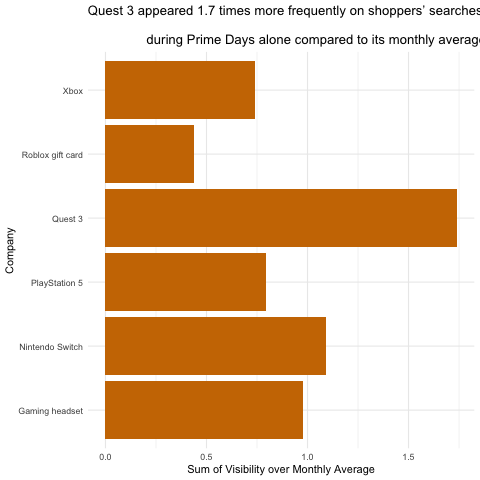

In [136]:
%%R -i df_prime_search_data_company

# Plot
p <- ggplot(df_prime_search_data_company, aes(x=sum_visibility_over_monthly_avg, y=company)) + 
  geom_bar(stat='identity', fill='#CC7700') + 
  labs(title="Quest 3 appeared 1.7 times more frequently on shoppers’ searches \n
                during Prime Days alone compared to its monthly average search.", 
       y="Company", x="Sum of Visibility over Monthly Average") + 
  theme_minimal() + 
  theme(axis.text.y = element_text(hjust = 1)) 

# Display the plot
print(p)


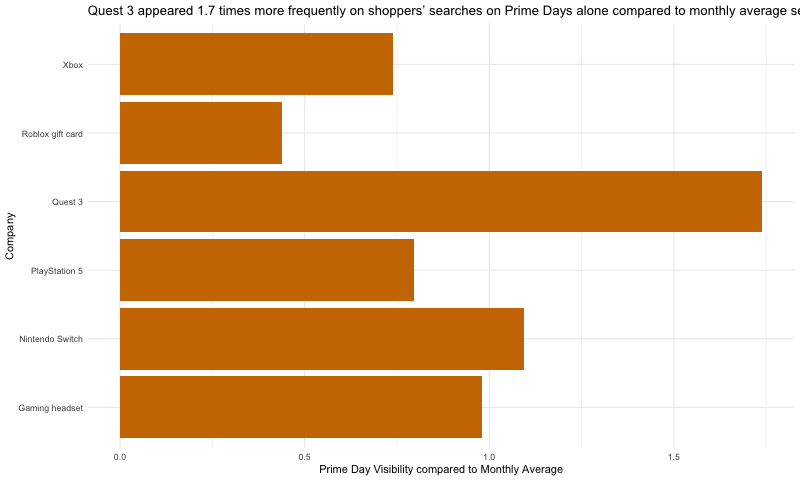

In [134]:
%%R -i df_prime_search_data_company -w 800

# Plot
p <- ggplot(df_prime_search_data_company, aes(x=sum_visibility_over_monthly_avg, y=company)) + 
  geom_bar(stat='identity', fill='#CC7700') + 
  labs(title="Quest 3 appeared 1.7 times more frequently on shoppers’ searches on Prime Days alone compared to monthly average search.", 
       y="Company", x="Prime Day Visibility compared to Monthly Average") + 
  theme_minimal() + 
  theme(axis.text.y = element_text(hjust = 1)) 

# Display the plot
print(p)


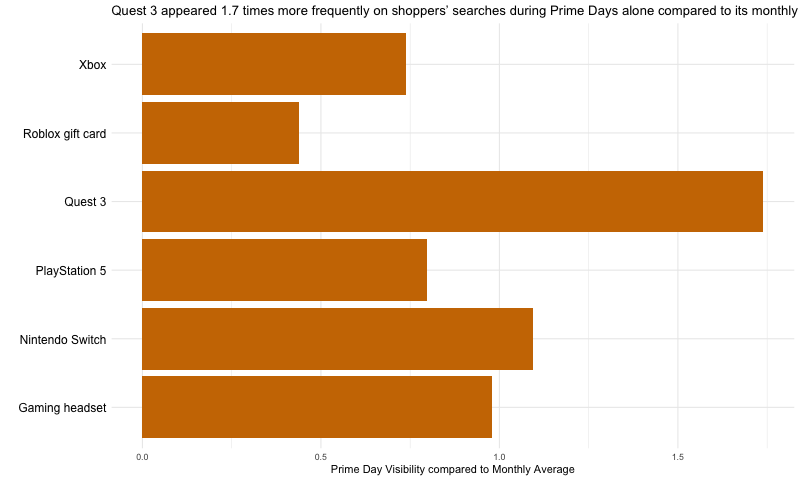

In [141]:
%%R -i df_prime_search_data_company -w 800

# Plot
p <- ggplot(df_prime_search_data_company, aes(x=sum_visibility_over_monthly_avg, y=company)) + 
  geom_bar(stat='identity', fill='#CC7700') + 
  labs(title="Quest 3 appeared 1.7 times more frequently on shoppers’ searches during Prime Days alone compared to its monthly average search.", 
       x="Prime Day Visibility compared to Monthly Average", y="") +  # y="" will remove the y-axis label
  theme_minimal() + 
  theme(axis.text.y = element_text(hjust = 1, size = 12, color = "black"))  # Adjusted the size and color here

# Display the plot
print(p)


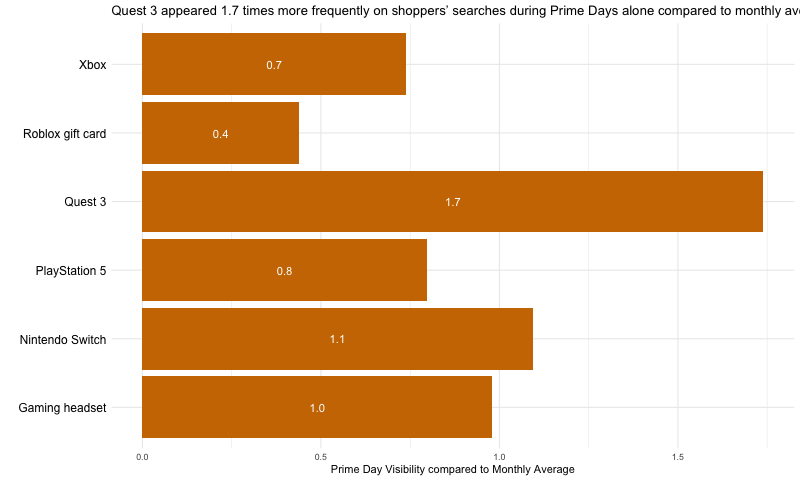

In [145]:
%%R -i df_prime_search_data_company -w 800

p <- ggplot(df_prime_search_data_company, aes(x=sum_visibility_over_monthly_avg, y=company)) + 
  geom_bar(stat='identity', fill='#CC7700') + 
  geom_text(aes(label=sprintf("%.1f", sum_visibility_over_monthly_avg)), # Formatting the label
            position=position_stack(vjust=0.5), color="white", size=4) + # Position the text in the middle of the bar
  labs(title="Quest 3 appeared 1.7 times more frequently on shoppers’ searches during Prime Days alone compared to monthly average", 
       x="Prime Day Visibility compared to Monthly Average", y="") + 
  theme_minimal() + 
  theme(axis.text.y = element_text(hjust = 1, size = 12, color = "black"))

# Display the plot
print(p)
